In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

In [ ]:
# Load Dataset Metadata
metadata_path = './Garbage_data/Garbage_Dataset_Classification/metadata.csv'
metadata_df = pd.read_csv(metadata_path)

,filename,label
0,cardboard_02038.jpg,cardboard
1,cardboard_02320.jpg,cardboard
2,cardboard_01728.jpg,cardboard
3,cardboard_00093.jpg,cardboard
4,cardboard_00094.jpg,cardboard


In [ ]:
# check any missing images
image_folder = './Garbage_data/Garbage_Dataset_Classification/images/'

metadata_df['filepath'] = (image_folder + '/' + metadata_df['label'] + '/' + metadata_df['filename'])

for i in metadata_df['filepath']:
    metadata_df['missing'] = not os.path.exists(i)
    

print(f"Missing {metadata_df['missing'].sum()} out of {len(metadata_df)} images")


Missing 0 out of 13901 images


In [ ]:
# check corrupted images 
def file_corrupted(path):
    try:
        img = Image.open(path)
        img.verify()
        return False
    except (IOError, SyntaxError):
        return True

metadata_df['corrupted'] = metadata_df['filepath'].apply(file_corrupted)
print(f"Corrupted {metadata_df['corrupted'].sum()} out of {len(metadata_df)} images")

Corrupted 0 out of 13901 images


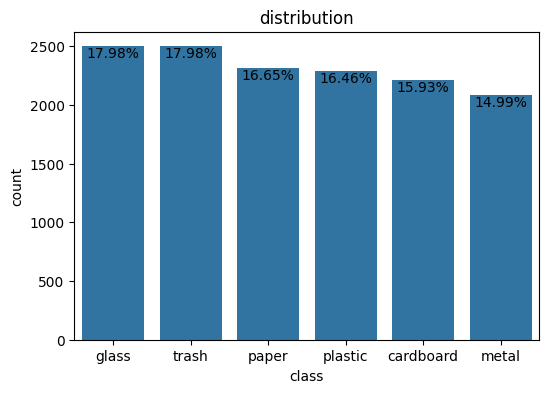

In [55]:
# get counts and percentages 

counts = metadata_df['label'].value_counts()
total = len(metadata_df)
labels = counts.index
values = counts.values
percentages = (values / total) * 100

plt.figure(figsize=(6,4))
ax = sns.barplot(x = labels, y = values)
ax.set_title("distribution")
ax.set_xlabel("class")
ax.set_ylabel("count")

for i in range(len(labels)):
    ax.text(i, values[i], f'{percentages[i]:.2f}%', ha = 'center', va = 'top')

plt.show()

    

In [65]:
sizes = {}
modes = {}

# conv to list to make things easier
filepaths = metadata_df['filepath'].tolist()

num_corrupted = 0
for i in range(len(metadata_df['filepath'])):
    path = filepaths[i]
    
    try:
        img = Image.open(path)
        width, height = img.size
        mode = img.mode
        img.close()
        
        # find all unique dimensions and modes
        dim = (width, height)
        sizes[dim] = sizes[dim]+1 if dim in sizes else 1
        modes[mode] = modes[mode]+1 if mode in modes else 1
    except (IOError, SyntaxError):
        num_corrupted+=1
    
print(f"Corrupted: {num_corrupted}")

 
print("Sizes: ")
for dim in sizes:
    print(f"{dim} : {sizes[dim]}")

print("Modes: ")
for mode in modes:
    print(f"{mode} : {modes[mode]}")
    

Corrupted: 0
Sizes: 
(256, 256) : 13901
Modes: 
RGB : 13901
